In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [11]:
dataurl="http://lib.stat.cmu.edu/datasets/boston"
columns=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv']
#df = pd.read_csv('housing.csv');
df = pd.read_csv(dataurl,sep="\s+",skiprows=22,header=None,names=columns)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,NaN,NaN
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,NaN,NaN,NaN
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,NaN,NaN,NaN


In [12]:
#data preprocessing
print(df.isnull().sum())

crim          0
zn            0
indus         0
chas        506
nox         506
rm          506
age         506
dis         506
rad         506
tax         506
ptratio     506
b          1012
lstat      1012
medv       1012
dtype: int64


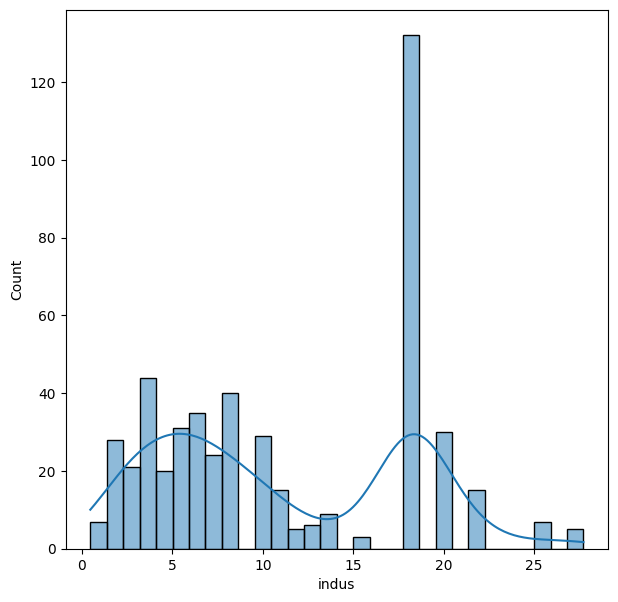

In [4]:
#plot distribution of target variable 'indus'
plt.figure(figsize=(7,7));
sb.histplot(df['indus'],bins=30,kde=True)
plt.show()

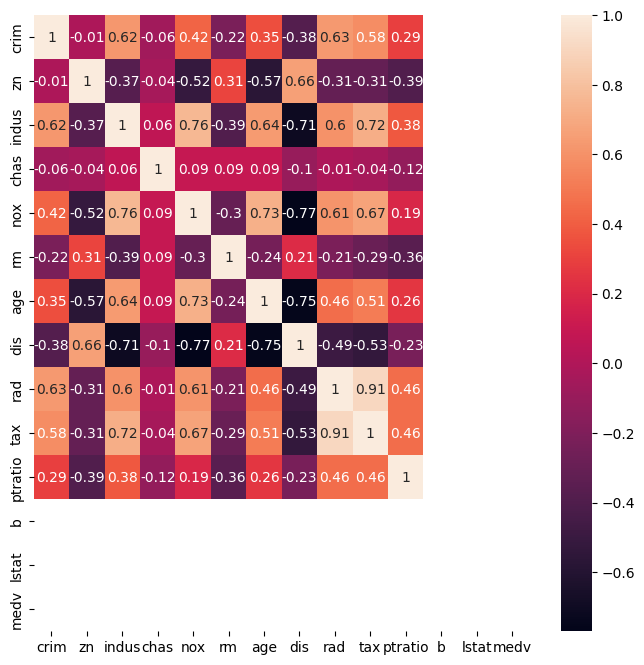

In [13]:
#heatmap that measures linear regression
plt.figure(figsize=(8,8));
cor_mat=df.corr(numeric_only=True).round(2);
sb.heatmap(data=cor_mat,annot=True);

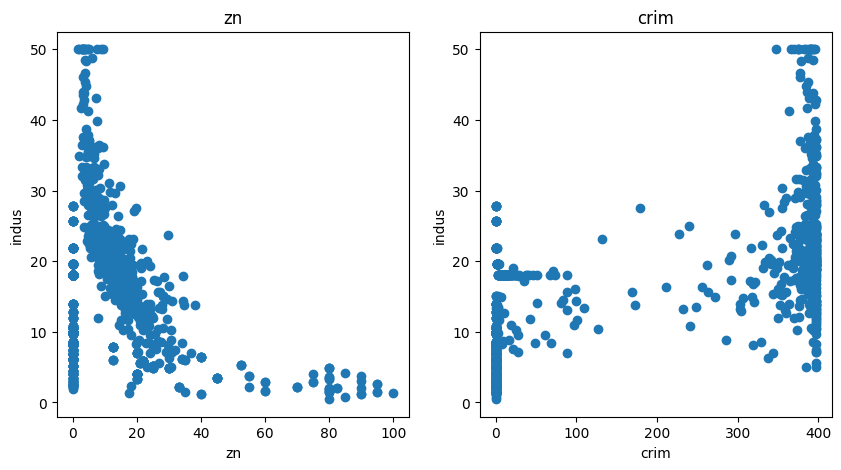

In [15]:
#linear regression using scatter plot
plt.figure(figsize=(10,5))
features=['zn','crim']
target=df['indus'];
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    X=df[col]
    Y=target
    plt.scatter(X,Y,marker="o")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('indus')

In [16]:
#spliting data into trainging asd testing set
from sklearn.model_selection import train_test_split
X=pd.DataFrame(np.c_[df['zn'],df['crim']],columns=['zn','crim'])
Y=df['indus']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

print(Y_test.shape)

(809, 2)
(203, 2)
(809,)
(203,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)
from sklearn.metrics import r2_score
Y_train_predict=lin_model.predict(X_train) 
rmse=(np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2=r2_score(Y_train,Y_train_predict)
print("model performance for:\n\n1. Training set")
print("RMSE = "+format(rmse))
print("R2 score = "+format(r2))
Y_test_predict = lin_model.predict(X_test);
rmse=(np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2=r2_score(Y_test,Y_test_predict)
print("\n2. Testing set")
print("RMSE = "+format(rmse))
print("R2 score"+format(r2))

model performance for:

1. Training set
RMSE = 6.7584566053117054
R2 score = 0.5294067008278771

2. Testing set
RMSE = 7.315922373262135
R2 score0.4732898100836683
